##3030 Assignment 6 Model Solution

In [63]:
# Task 1. "Download the monthly adjusted close price from Yahoo! for AAPL, BBRY, LULU and AMZN
# using .get_data_yahoo() (see the Chap. 11 notebook) for the last 60 months (or download the daily
# adjusted close and select out the monthends)"

In [64]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 6))
import pandas.io.data as web

In [65]:
# Obtaining the data from Yahoo, start date - January 1, 2010
# Your assignment will have a different start date, period and different stocks
aapl = web.get_data_yahoo('AAPL', '2010-06-01')['Adj Close']
bbry = web.get_data_yahoo('BBRY', '2010-06-01')['Adj Close']
lulu = web.get_data_yahoo('LULU', '2010-06-01')['Adj Close']
amzn = web.get_data_yahoo('AMZN', '2010-06-01')['Adj Close']

### Task 2. "Use matplotlib.pyplot.acorr() to plot the autocorrelation of each of the stocks. Are they autocorrelated?"

In [66]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot

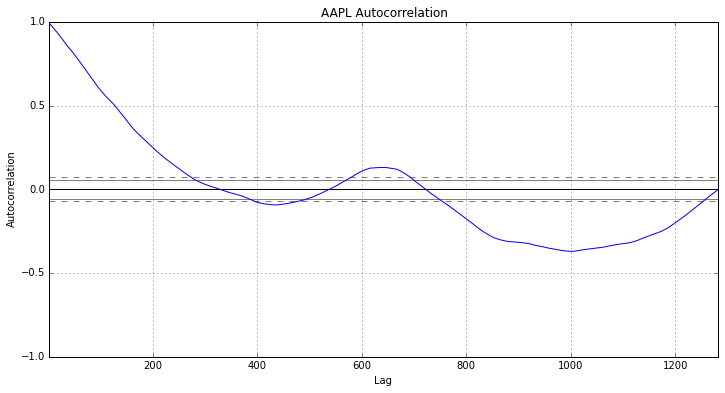

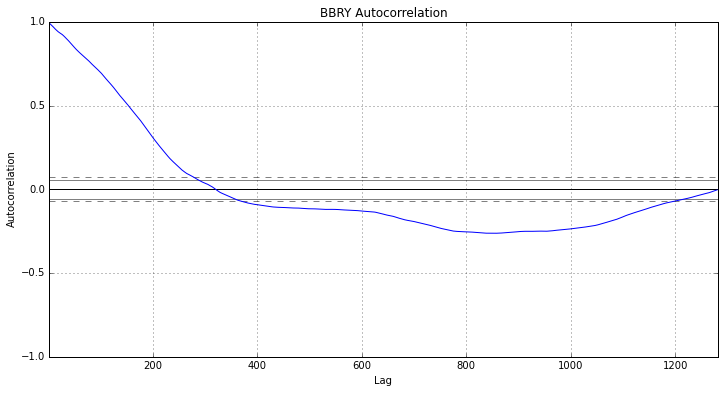

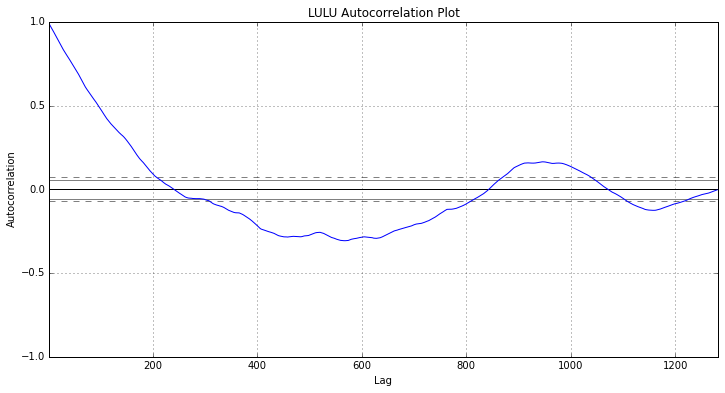

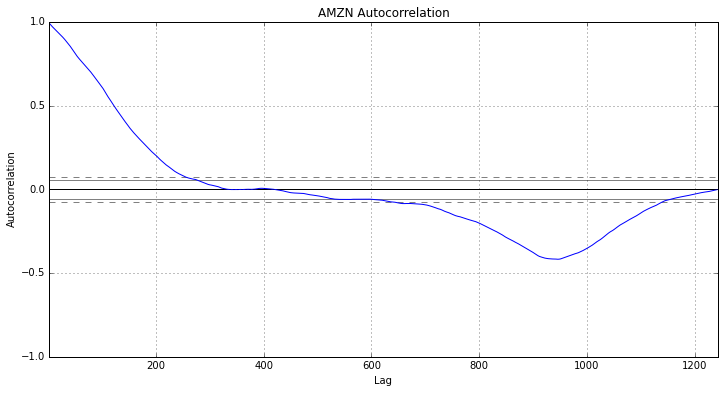

In [67]:
# Plot the auto-correlation graph for each stock using Pandas' autocorrelation_plot() function
plt.figure()
autocorrelation_plot(aapl)
plt.title('AAPL Autocorrelation')
plt.figure()
autocorrelation_plot(bbry)
plt.title('BBRY Autocorrelation')
plt.figure()
autocorrelation_plot(lulu)
plt.title('LULU Autocorrelation Plot')
plt.figure()
autocorrelation_plot(tlm)
plt.title('AMZN Autocorrelation')
plt.show()

(array([-1281, -1280, -1279, ...,  1279,  1280,  1281]),
 array([ 0.0006,  0.0012,  0.0018, ...,  0.0018,  0.0012,  0.0006]),
 <matplotlib.lines.Line2D at 0x21522b70>)

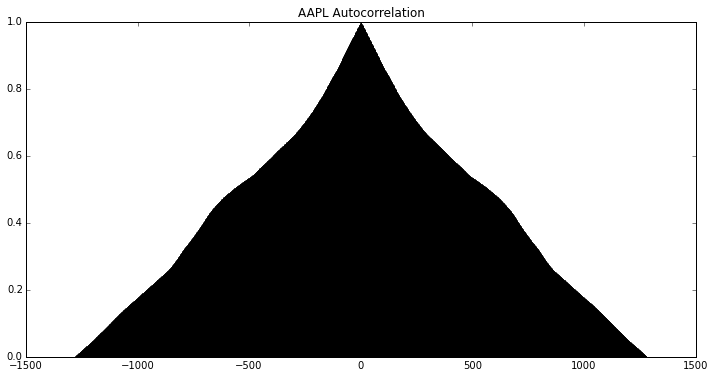

In [68]:
# An alternative way of plotting correlation using matplotlib instead:
plt.title('AAPL Autocorrelation')
plt.acorr(aapl, maxlags=len(aapl)-1)
# This plot will look different from the one generated by Pandas because:
#   (1) the correlation is calculated relative to 0 rather than to the average of the data
#   (2) the lag is shown from -1200 to 1200 rather than 0 to 1200

In [69]:
# All stocks are highly autocorrelated.  This is to be expected because yesterday's stock price
# gives you a lot of insight into today's: it's likely very close.  If they weren't autocorrelated
# that would mean that the prices jump all over the place from day to day: $5 one day, $47 the next,
# $0.02 the day after that.

### Task 3: "Calculate the monthly return over the period for each stock using the “shift trick” on the page titled Shifting in the Working with Time Series in Pandas deck"

In [70]:
# Resampling the data to get end of business month data points
aapl_monthend = aapl.resample('BM', how='last')
bbry_monthend = bbry.resample('BM', how='last')
lulu_monthend = lulu.resample('BM', how='last')
amzn_monthend = amzn.resample('BM', how='last')

# Check to make sure we got what we expected
aapl_monthend

Date
2010-06-30    33.752919
2010-07-30    34.520484
2010-08-31    32.621688
2010-09-30    38.076526
2010-10-29    40.388627
2010-11-30    41.753348
2010-12-31    43.284462
2011-01-31    45.533495
2011-02-28    47.397394
2011-03-31    46.766699
2011-04-29    46.984088
2011-05-31    46.675451
2011-06-30    45.043701
2011-07-29    52.398676
2011-08-31    51.640495
...
2014-05-30     88.869106
2014-06-30     91.327395
2014-07-31     93.951349
2014-08-29    101.233408
2014-09-30     99.505033
2014-10-31    106.665444
2014-11-28    117.969712
2014-12-31    109.488745
2015-01-30    116.214007
2015-02-27    127.925653
2015-03-31    123.912410
2015-04-30    124.629416
2015-05-29    130.279999
2015-06-30    125.430000
2015-07-31    126.440002
Freq: BM, Name: Adj Close, Length: 62

In [71]:
# calculating monthly returns for each stock
aapl_returns = aapl_monthend / aapl_monthend.shift(1) - 1
aapl_returns.name = 'AAPL'
aapl_returns

Date
2010-06-30         NaN
2010-07-30    0.022741
2010-08-31   -0.055005
2010-09-30    0.167215
2010-10-29    0.060722
2010-11-30    0.033790
2010-12-31    0.036670
2011-01-31    0.051959
2011-02-28    0.040935
2011-03-31   -0.013307
2011-04-29    0.004648
2011-05-31   -0.006569
2011-06-30   -0.034959
2011-07-29    0.163285
2011-08-31   -0.014469
...
2014-05-30    0.078709
2014-06-30    0.027662
2014-07-31    0.028731
2014-08-29    0.077509
2014-09-30   -0.017073
2014-10-31    0.071960
2014-11-28    0.105979
2014-12-31   -0.071891
2015-01-30    0.061424
2015-02-27    0.100777
2015-03-31   -0.031372
2015-04-30    0.005786
2015-05-29    0.045339
2015-06-30   -0.037228
2015-07-31    0.008052
Freq: BM, Name: AAPL, Length: 62

In [72]:
bbry_returns = bbry_monthend / bbry_monthend.shift(1) - 1
bbry_returns.name = 'BBRY'
bbry_returns

Date
2010-06-30         NaN
2010-07-30    0.167885
2010-08-31   -0.255345
2010-09-30    0.136555
2010-10-29    0.169029
2010-11-30    0.086261
2010-12-31   -0.059842
2011-01-31    0.016859
2011-02-28    0.119946
2011-03-31   -0.145921
2011-04-29   -0.139547
2011-05-31   -0.119219
2011-06-30   -0.326721
2011-07-29   -0.133449
2011-08-31    0.299600
...
2014-05-30   -0.007833
2014-06-30    0.347368
2014-07-31   -0.088867
2014-08-29    0.091104
2014-09-30   -0.023576
2014-10-31    0.056338
2014-11-28   -0.010476
2014-12-31    0.056785
2015-01-30   -0.075592
2015-02-27    0.065025
2015-03-31   -0.173913
2015-04-30    0.137738
2015-05-29   -0.035433
2015-06-30   -0.165306
2015-07-31   -0.026895
Freq: BM, Name: BBRY, Length: 62

In [73]:
lulu_returns = lulu_monthend / lulu_monthend.shift(1) - 1
lulu_returns.name = 'LULU'
lulu_returns

Date
2010-06-30         NaN
2010-07-30    0.114455
2010-08-31   -0.207570
2010-09-30    0.360511
2010-10-29   -0.008945
2010-11-30    0.209837
2010-12-31    0.276016
2011-01-31    0.003800
2011-02-28    0.129732
2011-03-31    0.147700
2011-04-29    0.123526
2011-05-31   -0.092454
2011-06-30    0.231498
2011-07-29    0.082812
2011-08-31   -0.095970
...
2014-05-30   -0.028304
2014-06-30   -0.092987
2014-07-31   -0.049654
2014-08-29    0.037952
2014-09-30    0.052091
2014-10-31   -0.008569
2014-11-28    0.157023
2014-12-31    0.157709
2015-01-30    0.187309
2015-02-27    0.033213
2015-03-31   -0.064582
2015-04-30   -0.005936
2015-05-29   -0.060497
2015-06-30    0.092156
2015-07-31   -0.001838
Freq: BM, Name: LULU, Length: 62

In [74]:
amzn_returns = amzn_monthend / amzn_monthend.shift(1) - 1
amzn_returns.name = 'AMZN'
amzn_returns

Date
2010-06-30         NaN
2010-07-30    0.078986
2010-08-31    0.058868
2010-09-30    0.258191
2010-10-29    0.052018
2010-11-30    0.061551
2010-12-31    0.026226
2011-01-31   -0.057556
2011-02-28    0.021516
2011-03-31    0.039471
2011-04-29    0.087048
2011-05-31    0.004494
2011-06-30    0.039656
2011-07-29    0.088171
2011-08-31   -0.032761
...
2014-05-30    0.027685
2014-06-30    0.039130
2014-07-31   -0.036302
2014-08-29    0.083230
2014-09-30   -0.048962
2014-10-31   -0.052661
2014-11-28    0.108623
2014-12-31   -0.083540
2015-01-30    0.142355
2015-02-27    0.072293
2015-03-31   -0.021202
2015-04-30    0.133512
2015-05-29    0.017663
2015-06-30    0.011323
2015-07-31    0.008339
Freq: BM, Name: AMZN, Length: 62

In [75]:
# concatenating all 4 time series into a datafame for further analysis
df_to_analyse = pd.concat([aapl_returns, bbry_returns, lulu_returns, amzn_returns], join='outer', axis = 1)

In [76]:
# dropping first row with NAs
df_to_analyse.dropna()

,AAPL,BBRY,LULU,AMZN
Date,,,,
2010-07-30,0.022741,0.167885,0.114455,0.078986
2010-08-31,-0.055005,-0.255345,-0.207570,0.058868
2010-09-30,0.167215,0.136555,0.360511,0.258191
2010-10-29,0.060722,0.169029,-0.008945,0.052018
2010-11-30,0.033790,0.086261,0.209837,0.061551
2010-12-31,0.036670,-0.059842,0.276016,0.026226
2011-01-31,0.051959,0.016859,0.003800,-0.057556
2011-02-28,0.040935,0.119946,0.129732,0.021516
2011-03-31,-0.013307,-0.145921,0.147700,0.039471


### TASK 4: "Visualize the correlation between the returns of all pairs of stocks"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000021BCD2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000229391D0>]], dtype=object)

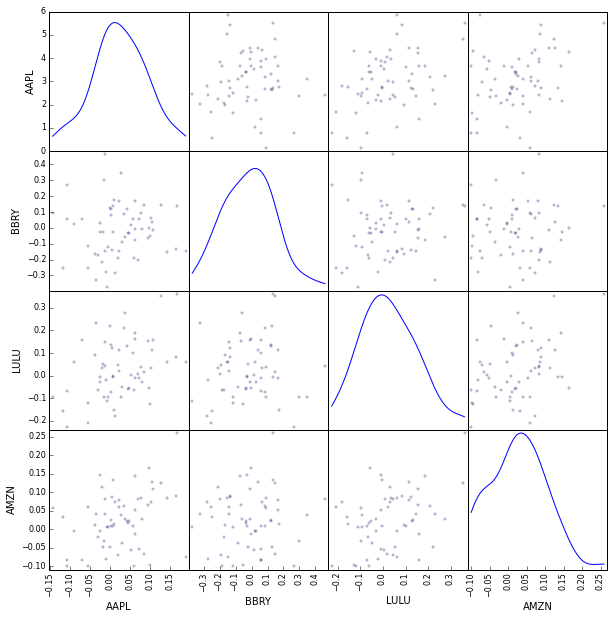

In [77]:
from pandas.tools.plotting import scatter_matrix

#Scatter plot matrix
scatter_matrix(df_to_analyse.dropna(), alpha=0.2, figsize=(10, 10), diagonal='kde')

### Question #5: "If you could only have two of them in a portfolio which would you choose and why?"

In [78]:
# Any answer to this is right as long as the "why" makes sense.  Stocks with low or negative
# correlation but similar returns over the period would have made a good combination as they would
# provide equivalent return to one or the other but with less month-to-month variability and so, in
# a sense, less risk.  Note however that this doesn't really say anything about whether they will
# continue to be low- or anti-correlated in the future.

In [79]:
# Transpose the dataframe in preparation for plotting
df_to_analyse_t = df_to_analyse.T
df_to_analyse_t.dropna(axis=1,how='all')

Date,2010-07-30 00:00:00,2010-08-31 00:00:00,2010-09-30 00:00:00,2010-10-29 00:00:00,2010-11-30 00:00:00,2010-12-31 00:00:00,2011-01-31 00:00:00,2011-02-28 00:00:00,2011-03-31 00:00:00,2011-04-29 00:00:00,...,2014-10-31 00:00:00,2014-11-28 00:00:00,2014-12-31 00:00:00,2015-01-30 00:00:00,2015-02-27 00:00:00,2015-03-31 00:00:00,2015-04-30 00:00:00,2015-05-29 00:00:00,2015-06-30 00:00:00,2015-07-31 00:00:00
AAPL,0.022741,-0.055005,0.167215,0.060722,0.033790,0.036670,0.051959,0.040935,-0.013307,0.004648,...,0.071960,0.105979,-0.071891,0.061424,0.100777,-0.031372,0.005786,0.045339,-0.037228,0.008052
BBRY,0.167885,-0.255345,0.136555,0.169029,0.086261,-0.059842,0.016859,0.119946,-0.145921,-0.139547,...,0.056338,-0.010476,0.056785,-0.075592,0.065025,-0.173913,0.137738,-0.035433,-0.165306,-0.026895
LULU,0.114455,-0.207570,0.360511,-0.008945,0.209837,0.276016,0.003800,0.129732,0.147700,0.123526,...,-0.008569,0.157023,0.157709,0.187309,0.033213,-0.064582,-0.005936,-0.060497,0.092156,-0.001838
AMZN,0.078986,0.058868,0.258191,0.052018,0.061551,0.026226,-0.057556,0.021516,0.039471,0.087048,...,-0.052661,0.108623,-0.083540,0.142355,0.072293,-0.021202,0.133512,0.017663,0.011323,0.008339


In [80]:
corr_plt = df_to_analyse_t.dropna(axis=1,how='all').values
corr_plt

array([[ 0.0227, -0.055 ,  0.1672,  0.0607,  0.0338,  0.0367,  0.052 ,
         0.0409, -0.0133,  0.0046, -0.0066, -0.035 ,  0.1633, -0.0145,
        -0.0091,  0.0615, -0.0558,  0.0597,  0.1271,  0.1883,  0.1053,
        -0.026 , -0.0107,  0.0109,  0.0458,  0.0939,  0.0028, -0.1076,
        -0.0124, -0.0907, -0.1441, -0.0253,  0.0029,  0.0003,  0.0224,
        -0.1183,  0.1412,  0.0838, -0.0215,  0.0964,  0.0701,  0.0089,
        -0.1077,  0.0575,  0.02  ,  0.0994,  0.0787,  0.0277,  0.0287,
         0.0775, -0.0171,  0.072 ,  0.106 , -0.0719,  0.0614,  0.1008,
        -0.0314,  0.0058,  0.0453, -0.0372,  0.0081],
       [ 0.1679, -0.2553,  0.1366,  0.169 ,  0.0863, -0.0598,  0.0169,
         0.1199, -0.1459, -0.1395, -0.1192, -0.3267, -0.1334,  0.2996,
        -0.3752, -0.0049, -0.1158, -0.1881,  0.1469, -0.1479,  0.0374,
        -0.0272, -0.2776, -0.2846, -0.0325, -0.0643,  0.1211,  0.0573,
         0.4628,  0.0233,  0.0935,  0.0293,  0.0816,  0.1273, -0.143 ,
        -0.2507, -0.154

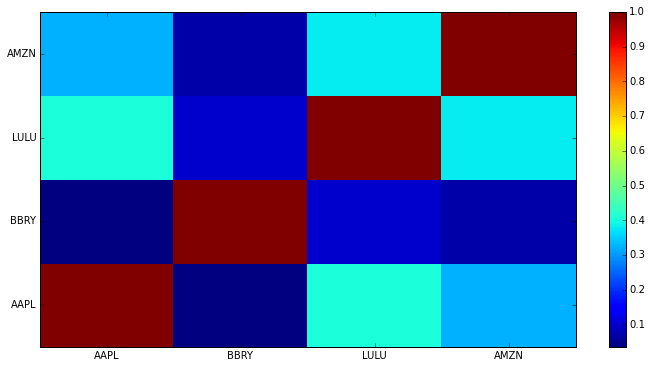

In [81]:
# Plot the correlation of the returns
from numpy import corrcoef, sum, log, arange
from pylab import pcolor, show, colorbar, xticks, yticks

R = corrcoef(corr_plt)
pcolor(R)
colorbar()
yticks(arange(0.5,4),['AAPL', 'BBRY', 'LULU', 'AMZN'])
xticks(arange(0.5,4),['AAPL', 'BBRY', 'LULU', 'AMZN'])
show()

In [82]:
# We can see along the diagonal that the stocks' returns are perfectly correlated with themselves as
# we'd expect.  AAPL and BBRY's returns are the least correlated.  AAPL and LULU's are the
# most correlated.